# Práctica
1. Escriba una función en Python, $dvs\left(A\right)$, que devuelva una terna U, S, VT con la descomposición en valores singulares de A, donde U y V son las matrices $U,V^{T}$; y S es un vector tal que $\Sigma=diag\left(S\right)$.

In [2]:
import numpy as np

def dvs(A):
    B = A.T @ A
    avals, avecs = np.linalg.eig(B)
    # Los ordeno decrecientemente
    order = np.argsort(avals)[::-1]
    avals, avecs = avals[order], avecs[:,order]
    VT = avecs.T
    S = np.sqrt(avals)
    U = A @ VT @ np.diag(1/S)
    return U, S, VT

In [3]:
A = np.matrix([
    [2, -1],
    [2, 2],
])
A, A.T

(matrix([[ 2, -1],
         [ 2,  2]]),
 matrix([[ 2,  2],
         [-1,  2]]))

In [4]:
B = A.T @ A
B

matrix([[8, 2],
        [2, 5]])

In [5]:
from numpy.linalg import svd
u, s, vh = svd(A)

In [6]:
assert np.allclose(u @ np.diag(s) @ vh, A)

In [7]:
U, S, VT = dvs(A)
assert np.allclose(U @ np.diag(S) @ VT, A)

AssertionError: 

In [8]:
U @ np.diag(S) @ VT

matrix([[ 2. ,  1. ],
        [-0.4,  2.8]])

4. Utilice la implementación de referencia para “comprimir” la imagen jupiter.png con una pérdida no mayor al 30% de la información original. En qué razón pudo comprimir la información?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('jupiter.jpg')
img.shape

(1024, 1024, 3)

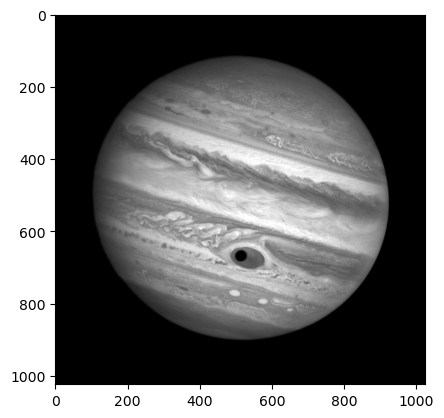

In [10]:
plt.imshow(img)

In [11]:
def rgb2gray(rgb):
    red, green, blue = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    return .299 * red + .587 * green + .114 * blue

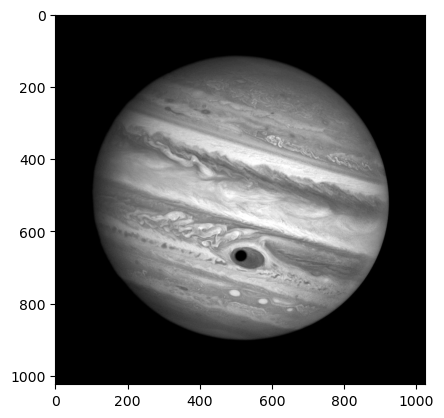

In [12]:
grayimg = rgb2gray(img)
plt.imshow(grayimg, cmap="gray")

In [13]:
u, s, vh = np.linalg.svd(grayimg)

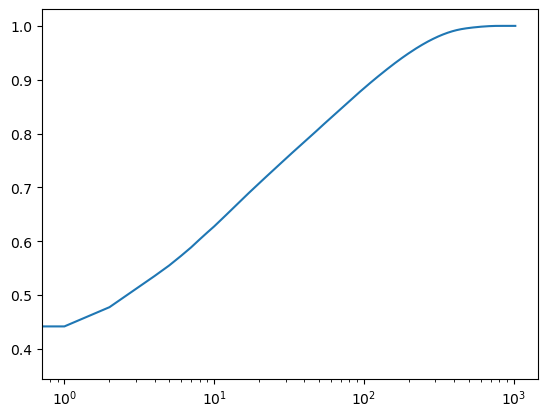

In [14]:
plt.plot(s.cumsum() / s.sum())
plt.xscale("log")

In [15]:
loss = 0.3
k = np.argmax(s.cumsum() / s.sum() > (1 - loss))
k

19

In [16]:
u.shape, s.shape, vh.shape

((1024, 1024), (1024,), (1024, 1024))

In [17]:
recovered = u[:, :k] @ np.diag(s[:k]) @ vh[:k, :]
recovered.shape

(1024, 1024)

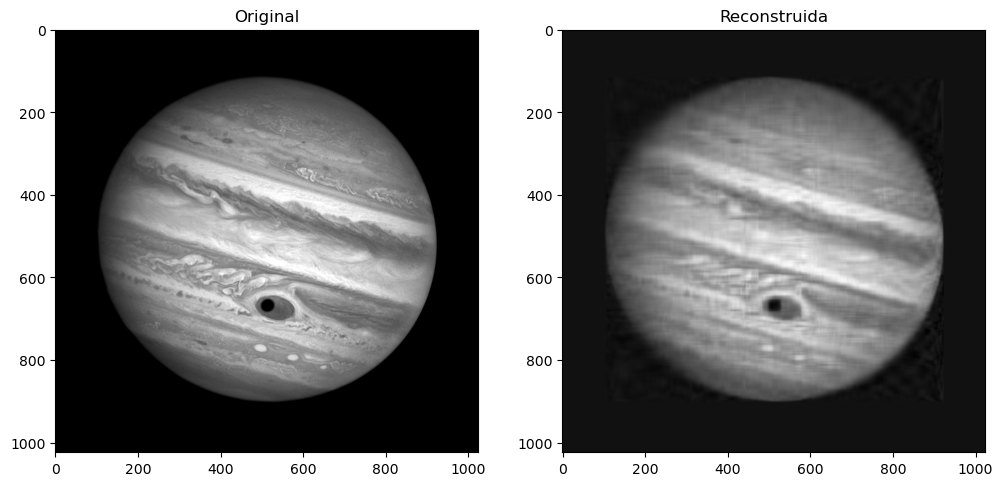

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(grayimg, cmap="gray")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(recovered, cmap="gray")
plt.title("Reconstruida")
plt.show()

In [20]:
import pickle as pkl
pkl.dump(grayimg, open("orig-jupiter.pkl", "wb"))
pkl.dump((u[:, :k], s[:k], vh[:k, :]), open("reco-jupiter.pkl", "wb"))

In [21]:
from PIL import Image
import numpy as np
a = np.zeros((5, 5))
orig = Image.fromarray(np.uint8(grayimg), mode='L')
reco = Image.fromarray(np.uint8(np.clip(recovered, 0, 255)), mode='L')

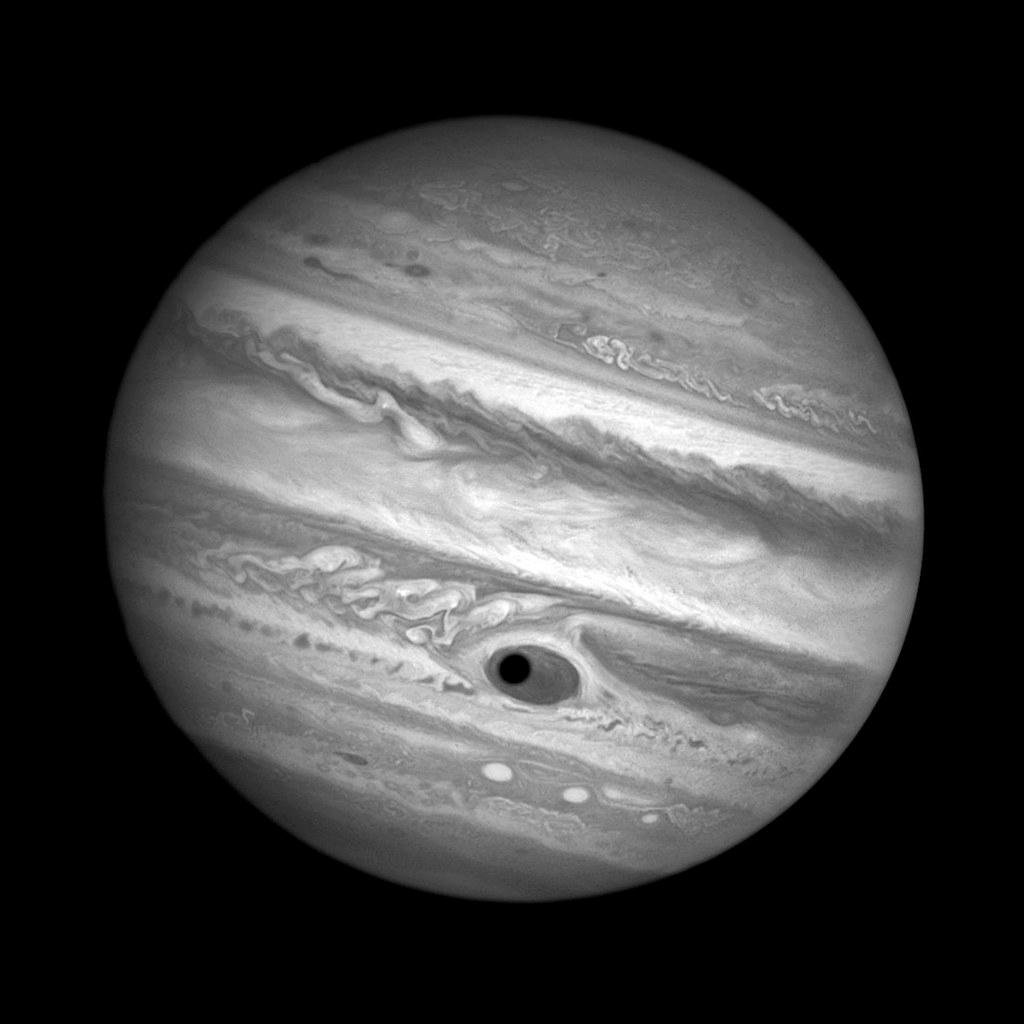

In [22]:
orig

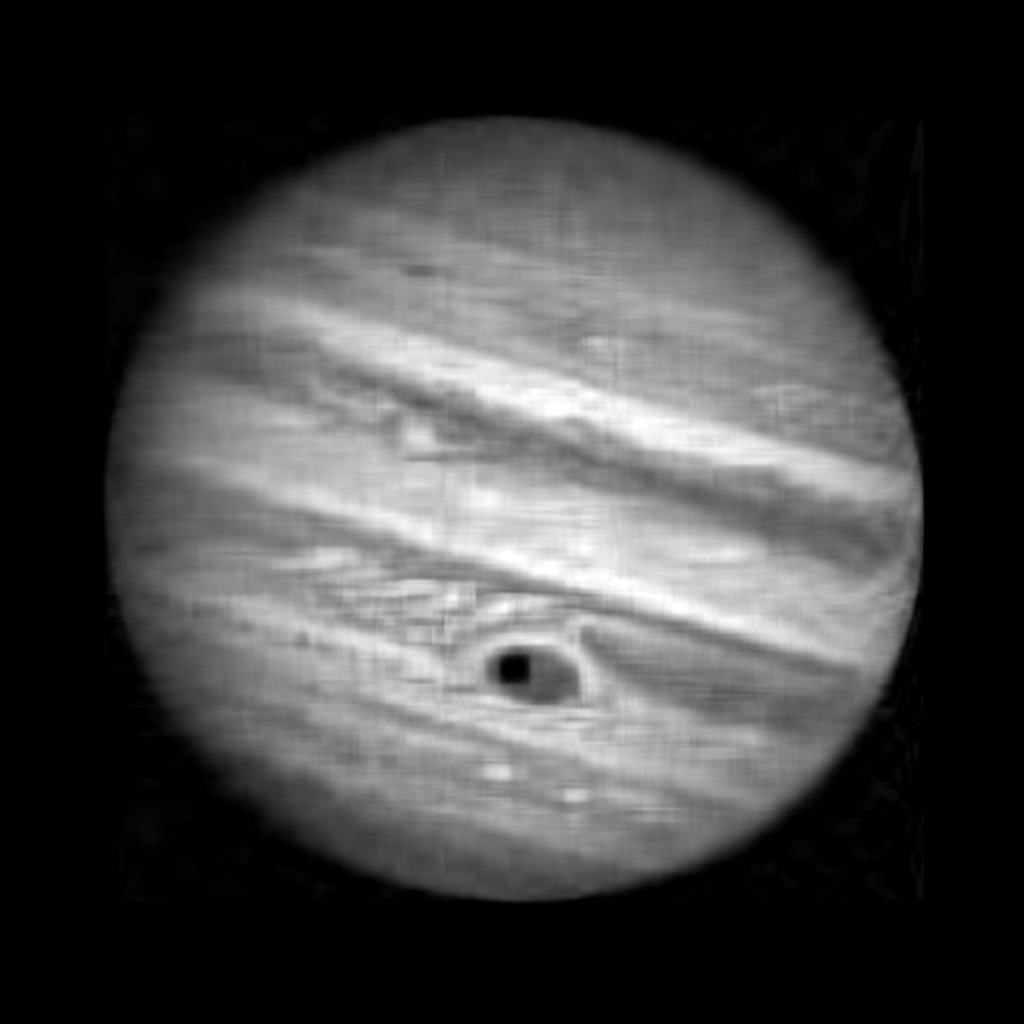

In [23]:
reco

In [25]:
orig.save("orig-jupiter.png")
reco.save("reco-jupiter.png")